***DRUG PREDICTION***


# **Load Data**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv"
data=pd.read_csv(url)
data


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# **EDA**

## **Cleaning Data**

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
data[data.duplicated()]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [6]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## **Visualisation**

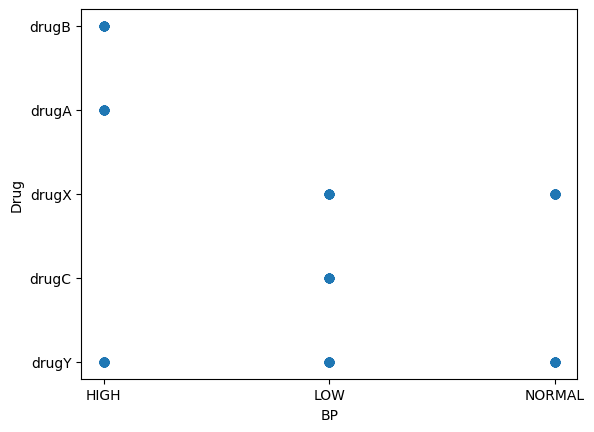

In [9]:
#BP vs Drug
x=data['BP']
y=data['Drug']
plt.scatter(x,y)
plt.xlabel("BP")
plt.ylabel("Drug")
plt.show()

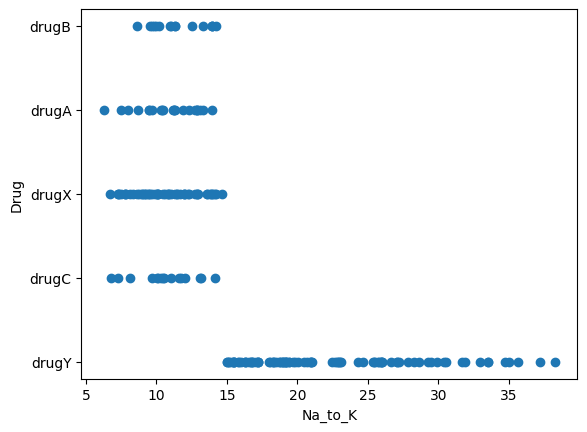

In [10]:
#Na_to_K  vs Drug
x=data['Na_to_K']
y=data['Drug']
plt.scatter(x,y)
plt.xlabel("Na_to_K")
plt.ylabel("Drug")
plt.show()

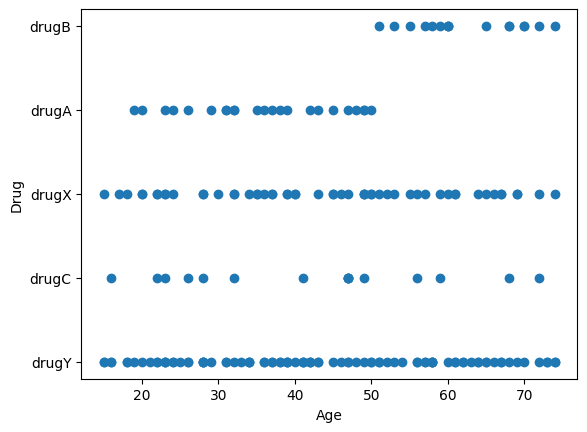

In [11]:
#Age vs Drug
x=data['Age']
y=data['Drug']
plt.scatter(x,y)
plt.xlabel("Age")
plt.ylabel("Drug")
plt.show()

# **Data Preprocessing**

## **Label Encoding**

In [12]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

data['Sex']=le.fit_transform(data['Sex'])
data['BP']=le.fit_transform(data['BP'])
data['Cholesterol']=le.fit_transform(data['Cholesterol'])
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


## **Data Scalling**

In [13]:
y=data['Drug']
x=data.drop(['Drug'],axis=1)


from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
x['Age']=ss.fit_transform(np.array(x['Age']).reshape(-1,1))
x['Sex']=ss.fit_transform(np.array(x['Sex']).reshape(-1,1))
x['Cholesterol']=ss.fit_transform(np.array(x['Cholesterol']).reshape(-1,1))
x['BP']=ss.fit_transform(np.array(x['BP']).reshape(-1,1))
x['Na_to_K']=ss.fit_transform(np.array(x['Na_to_K']).reshape(-1,1))
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,-1.291591,-1.040833,-1.110169,-0.970437,1.286522
1,0.162699,0.960769,0.109797,-0.970437,-0.415145
2,0.162699,0.960769,0.109797,-0.970437,-0.828558
3,-0.988614,-1.040833,1.329763,-0.970437,-1.149963
4,1.011034,-1.040833,0.109797,-0.970437,0.271794
...,...,...,...,...,...
195,0.708057,-1.040833,0.109797,-0.970437,-0.626917
196,-1.715759,0.960769,0.109797,-0.970437,-0.565995
197,0.465676,0.960769,1.329763,-0.970437,-0.859089
198,-1.291591,0.960769,1.329763,1.030464,-0.286500


## **Data Splitting**

In [15]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)



# **Data Modelling**

## **Logistic Regression**

In [16]:
#Creating a model

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
#Make Prediction

y_lr_pred=lr.predict(x_test)


In [36]:
#accuracy check
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm=confusion_matrix(y_test,y_lr_pred)
cm

array([[ 4,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0],
       [ 0,  1,  3,  0,  0],
       [ 0,  0,  0, 13,  0],
       [ 0,  0,  0,  2, 15]])

In [37]:
cr=classification_report(y_test,y_lr_pred)
print(cr)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       0.67      1.00      0.80         2
       drugC       1.00      0.75      0.86         4
       drugX       0.87      1.00      0.93        13
       drugY       1.00      0.88      0.94        17

    accuracy                           0.93        40
   macro avg       0.91      0.93      0.90        40
weighted avg       0.94      0.93      0.93        40



In [38]:
acs_lr=accuracy_score(y_test,y_lr_pred)
print(acs_lr)

0.925


## **Decision Tree**

In [39]:
#Create a model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
#make a prediction
y_dt_pred=dt.predict(x_test)
y_dt_pred

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY',
       'drugA', 'drugA', 'drugX', 'drugX', 'drugB', 'drugY', 'drugX',
       'drugX', 'drugX', 'drugY', 'drugB', 'drugX', 'drugX', 'drugY',
       'drugC', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugY', 'drugY', 'drugY'], dtype=object)

In [41]:
#accuracy check

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_dt_pred)
cm


array([[ 4,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 13,  0],
       [ 0,  0,  0,  0, 17]])

In [42]:
cr=classification_report(y_test,y_dt_pred)
print(cr)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         2
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        13
       drugY       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [43]:
acs_dt=accuracy_score(y_test,y_dt_pred)
print(acs_dt)


1.0


## **Random Forest**

In [44]:
#create a model
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators = 100, criterion ='entropy', random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [45]:
# make prediction
y_rf_pred=rf.predict(x_test)
y_rf_pred

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY',
       'drugA', 'drugA', 'drugX', 'drugX', 'drugB', 'drugY', 'drugX',
       'drugX', 'drugX', 'drugY', 'drugB', 'drugX', 'drugX', 'drugY',
       'drugX', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugY', 'drugY', 'drugY'], dtype=object)

In [46]:
#check accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_rf_pred)
cm

array([[ 4,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0],
       [ 0,  0,  3,  1,  0],
       [ 0,  0,  0, 13,  0],
       [ 0,  0,  0,  0, 17]])

In [47]:
cr=classification_report(y_test,y_rf_pred)
print(cr)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         2
       drugC       1.00      0.75      0.86         4
       drugX       0.93      1.00      0.96        13
       drugY       1.00      1.00      1.00        17

    accuracy                           0.97        40
   macro avg       0.99      0.95      0.96        40
weighted avg       0.98      0.97      0.97        40



In [48]:
acs_rf=accuracy_score(y_test,y_rf_pred)
print(acs_rf)

0.975


## **KNN(K-K-nearest neighbors)**

In [49]:
#create a model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2, p=2, metric='minkowski') # by default n_neighbors = 5
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [50]:
# make prediction
y_knn_pred=knn.predict(x_test)
y_knn_pred

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY',
       'drugA', 'drugA', 'drugX', 'drugX', 'drugA', 'drugA', 'drugX',
       'drugX', 'drugX', 'drugC', 'drugB', 'drugX', 'drugX', 'drugY',
       'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugB', 'drugY', 'drugY', 'drugX'], dtype=object)

In [51]:
#check accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_knn_pred)
cm

array([[ 3,  1,  0,  0,  0],
       [ 1,  1,  0,  0,  0],
       [ 0,  1,  2,  0,  1],
       [ 0,  0,  0, 13,  0],
       [ 1,  0,  1,  1, 14]])

In [52]:
cr=classification_report(y_test,y_knn_pred)
print(cr)

              precision    recall  f1-score   support

       drugA       0.60      0.75      0.67         4
       drugB       0.33      0.50      0.40         2
       drugC       0.67      0.50      0.57         4
       drugX       0.93      1.00      0.96        13
       drugY       0.93      0.82      0.87        17

    accuracy                           0.82        40
   macro avg       0.69      0.71      0.70        40
weighted avg       0.84      0.82      0.83        40



In [53]:
acs_knn=accuracy_score(y_test,y_knn_pred)
print(acs_knn)

0.825


## **SVM(Support Vector Machine)**

In [54]:

#create model
from sklearn.svm import SVC
svc=SVC(kernel='rbf',C=100,gamma='auto')
svc.fit(x_train,y_train)

SVC(C=100, gamma='auto')

In [55]:
# make prediction
y_svc_pred=svc.predict(x_test)
y_svc_pred

array(['drugX', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY',
       'drugA', 'drugA', 'drugX', 'drugX', 'drugB', 'drugY', 'drugX',
       'drugX', 'drugX', 'drugY', 'drugB', 'drugX', 'drugX', 'drugY',
       'drugC', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugY', 'drugY', 'drugY'], dtype=object)

In [56]:
#check accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_svc_pred)
cm

array([[ 4,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 11,  2],
       [ 0,  0,  0,  0, 17]])

In [57]:
cr=classification_report(y_test,y_svc_pred)
print(cr)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         2
       drugC       1.00      1.00      1.00         4
       drugX       1.00      0.85      0.92        13
       drugY       0.89      1.00      0.94        17

    accuracy                           0.95        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.96      0.95      0.95        40



In [58]:
acs_svm=accuracy_score(y_test,y_svc_pred)
print(acs_svm)

0.95


## **Naive Bayes Classification**

In [59]:
#create model
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [60]:
#make prediction
y_gnb_pred=gnb.predict(x_test)
y_gnb_pred

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugX', 'drugX',
       'drugC', 'drugC', 'drugY', 'drugX', 'drugC', 'drugA', 'drugY',
       'drugA', 'drugA', 'drugX', 'drugX', 'drugB', 'drugA', 'drugX',
       'drugX', 'drugX', 'drugC', 'drugB', 'drugX', 'drugX', 'drugY',
       'drugC', 'drugX', 'drugC', 'drugC', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugY', 'drugY', 'drugY'], dtype='<U5')

In [61]:
#check accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_gnb_pred)
cm

array([[ 4,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 13,  0],
       [ 2,  0,  4,  0, 11]])

In [62]:
cr=classification_report(y_test,y_gnb_pred)
print(cr)


              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         4
       drugB       1.00      1.00      1.00         2
       drugC       0.50      1.00      0.67         4
       drugX       1.00      1.00      1.00        13
       drugY       1.00      0.65      0.79        17

    accuracy                           0.85        40
   macro avg       0.83      0.93      0.85        40
weighted avg       0.92      0.85      0.86        40



In [63]:
acs_gnb=accuracy_score(y_test,y_gnb_pred)
print(acs_gnb)

0.85


# **Evaluate performence**

In [64]:
data={'method':["logistic Regression","Decision Tree","Random forest","KNN","SVM","Naive Bayes"],
      'Accuracy score':[acs_lr,acs_dt,acs_rf,acs_knn,acs_svm,acs_gnb],

      }

result=pd.DataFrame(data)
result.columns=["method","Accuracy score"]
result

,method,Accuracy score
0,logistic Regression,0.925
1,Decision Tree,1.000
2,Random forest,0.975
3,KNN,0.825
4,SVM,0.950
5,Naive Bayes,0.850
